# Streaming, TV, and Sports
*By: Sidharth Srikanth and Vishal Bailoor

We sought to discover the true effect of streaming on TV by looking at changes in TV show ratings and sports programming ratings over time. TV show data captures the comparable set of programming to a Netflix or Amazon Video. Sports, meanwhile, has historically been popular and tied to a live experience. The media has trumpeted the effect of streaming on TV, including sports programming, and we wanted to see what the data has to say.

**Introduction: The Death of Television (may have been greatly exaggerated)**

The rise of Netflix and Amazon Video have dominated the news for a number of years, alongside concurrent trends like cord-cutting, streaming, and the decline of media and cable television. Logic would suggest the two are connected, that the rise of convenient, centralized streaming would itself harm current media, especially TV. Netflix statistics are used here as a proxy for streaming numbers, as a market-dominant firm.

We sought to answer two key questions surrounding this emerging trend. 

#1. **What effect has the rise of Netflix and streaming video had on conventional television?**

Key metrics here include [INSERT KEY METRICS HERE SID]

#2. **To what extent has sports viewership been affected by the rise of streaming?**

Key metrics here include *ratings numbers*, *viewership numbers*, *year-over-year change*, and *weekly and yearly numbers*.

**Data**

Question 1:

[Fill in Data Methodology]

Question 2:

Sports are a very different phenomenon from the remainder of network TV, which the other portion of the project covers. Sports are consistently higher rated across channels, are less channel-specific, and on a business side have separate media rights contracts to production shows.

This part draws from a number of web sources. The bulk of the data comes from http://www.sportsmediawatch.com/nfl-tv-ratings-viewership-nbc-cbs-fox-espn-nfln-regular-season-playoffs/. This data is on 2014-current ratings and viewership for various football matches. Additional data has been filled in from ESPN.com (which reports viewers/ratings for certain high-ticket games) and http://tvbythenumbers.zap2it.com/tag/nfl-football-ratings/. The latter source was primarily used to fill in unreported games from sportsmediawatch.

SportsMediaWatch("SMW") provides week-by-week data. We then manually downloaded and cleaned the data from 2014-now. 2013 data can be derived from the change numbers in 2014, but we also got comparable raw 2013 data from TV-by-the-numbers. ESPN.com served as a fact-check for blue-chip games. 

Operationally, we first downloaded the raw data in CSV form from sportsmediawatch. The CSV link on a public Github file is below. We then cleaned it and organized it in this notebook.

In [390]:
import sys                         
import pandas as pd                
import matplotlib as mpl           
import matplotlib.pyplot as plt      
import datetime as dt               

In [391]:
url = "https://raw.githubusercontent.com/vishbail/DB-Final-Project/master/DB%20Final%20Project%20Data%20Raw.csv"

#sdf stands for sports data frame, distinguished from the non sports data frame
sdf = pd.read_csv(url)

In [392]:
#remove all internal header rows - found through unfortunate trial and error
sdf = sdf.drop(sdf.index[80:82])
sdf = sdf.drop(sdf.index[186:188])
sdf = sdf.drop(sdf.index[293:294])

In [393]:
##Part 0: Cleaning and Summarizing Data

# drop unnecessary first row
sdf = sdf.drop(sdf.index[0:1])

#drop empty end columns
sdf = sdf.drop(sdf.columns[8:], axis=1)


#Sets internal column headers into overall headers
sdf.columns = sdf.iloc[0]
sdf = sdf.drop(sdf.index[0])

###failed column change attempts (remove/ignore)
#sdf["Year"][2:3] = 2015
#sdf.iloc[9][2:3] = 2015
#for i in range(2,79):
 #   sdf.set_value(2, 9, 2015)s

#Rename Unclear columns
sdf.columns.values[3] = "Vwrs. Change"
sdf.columns.values[5] = "Rtg. Change"

#drop rows with no game ratings and convert others to floats
sdf = sdf.dropna(subset = ["Rtg."])
sdf["Rtg."] = sdf["Rtg."].astype(float)
sdf = sdf.dropna(subset = ["Vwrs."])
sdf["Vwrs."] = sdf["Vwrs."].astype(float)
sdf = sdf.dropna(subset = ["Week"])
sdf["Week"] = sdf["Week"].astype(int)

sdf = sdf.set_index(["Year","Week"])

### Part 1: Sports. Sports Never Changes.

The rise of Netflix and Amazon Video have dominated the news for a number of years, alongside concurrent trends like cord-cutting, streaming, and the decline of media and cable television. We drew from SportsMediaWatch and ESPN data to test our hypothesis:

Given cord-cutting and a turn from television to streaming, consumption of sports on conventional channels will decrease.

This first figure makes a simple line plot of ratings data against time. 

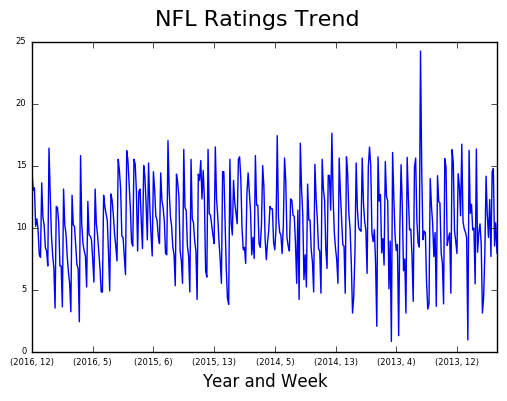

In [395]:
fig = plt.figure()
sdf["Rtg."].plot(fontsize=6)
fig.suptitle("NFL Ratings Trend", fontsize=16)
plt.xlabel("Year and Week", fontsize=12)
plt.show()

Surprisingly, this heartbeat-esque plot shows that there is little or no change over time, with the range of starting and ending ratings being within the same 8-15 range. Perhaps gross viewership, a component of ratings (which are at least partially driven by percentage of viewers watching) but a separate statistic, shows a different story?

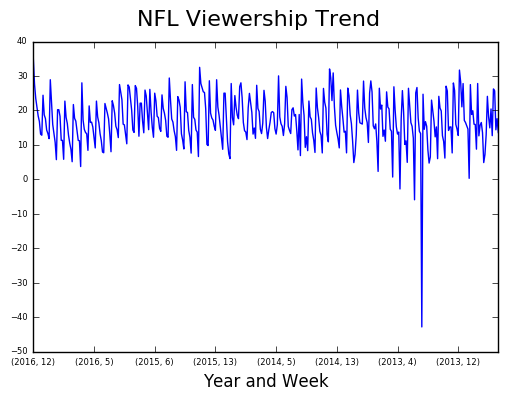

In [396]:
fig1 = plt.figure()
sdf["Vwrs."].plot(fontsize=6)
fig1.suptitle("NFL Viewership Trend", fontsize=16)
plt.xlabel("Year and Week", fontsize=12)
plt.show()

Aside from an aberrative number in the fall of 2013 (negative viewers would certainly be bad for TV), viewership numbers have at least weakly increased since 2013, with a good portion of 2013 under or around 10 million viewers and almost all of 2014-2015 above it, though 2016 appears to show decline.

Netflix, though has been strong over the same period. A look at (manually summarized) subscriber numbers shows this:

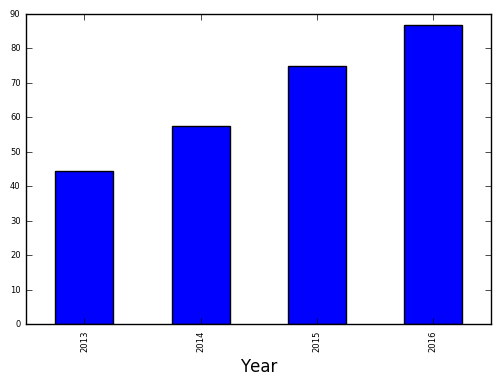

In [397]:
##ndf stands for netflix data frame
#data sourced from https://www.statista.com/statistics/250934/quarterly-number-of-netflix-streaming-subscribers-worldwide/
ndf = pd.DataFrame(dict(subscribers = pd.Series([44.35, 57.39, 74.76, 86.74]), year = pd.Series([2013,2014,2015,2016])))
ndf = ndf.set_index(ndf["year"])
ndf = ndf.drop(ndf.columns[1], axis=1)
ndf

fig2 = plt.figure()
ndf["subscribers"].plot(fontsize=6, kind="bar")
fig.suptitle("Netflix Subscriber Data", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.show()

Netflix subscribers have almost doubled over the same time period, indicating that though Netflix has grown, it has certainly not come at the expense of sports. Sports ratings and viewership are steady, and small inter-week fluctuations aside, sports programming shows no sign of change in this age of Netflix.

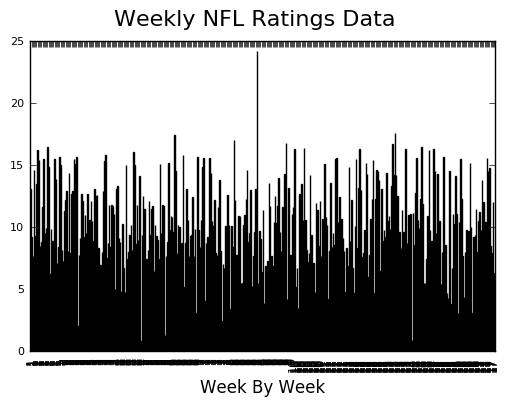

In [401]:
sdf = sdf.reset_index()

sdf = sdf.sort_values(by="Year")
sdf = sdf.sort_values(by="Week")

sdf = sdf.set_index(["Week"]) 

fig3 = plt.figure()
sdf["Rtg."].plot(fontsize=8, kind="bar")
fig3.suptitle("Weekly NFL Ratings Data", fontsize=16)
plt.xlabel("Week By Week", fontsize=12)
plt.show()

(Apologies for the nasty x-axis labeling, I tried to fix it for over an hour and abjectly failed. Essentially the x axis tracks weeks over time.)

A small digression, we wanted to test if weekly numbers showed a pattern across years, for example if sports rating increased on holidays or when college is in session. As the bar graph above attests, there is little pattern in the weekly data, an especially odd thought given the hype around start-of-season games and end-of-season playoff-deciding games.

Though specific networks such as ESPN may or may not be declining, the data shows that cross-channel trends in sports viewership are relatively stable.

With viewership and ratings holding steady as Netflix rises, and knowing that weekly trends are not masking other patterns, we believe that **sports viewership has not been affected by streaming.**